In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [4]:
data.isnull().sum()

Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64

In [5]:
data.dtypes

Participant ID                     int64
Age                                int64
Gender                            object
Current Weight (lbs)             float64
BMR (Calories)                   float64
Daily Calories Consumed          float64
Daily Caloric Surplus/Deficit    float64
Weight Change (lbs)              float64
Duration (weeks)                   int64
Physical Activity Level           object
Sleep Quality                     object
Stress Level                       int64
Final Weight (lbs)               float64
dtype: object

In [6]:
data_encoded = data.copy()

# 'Gender'
data_encoded['Gender'] = data_encoded['Gender'].map({'M': 0, 'F': 1})

# 'Physical Activity Level'
activity_mapping = {'Sedentary': 0, 'Lightly Active': 1, 'Moderately Active': 2, 'Very Active': 3}
data_encoded['Physical Activity Level'] = data_encoded['Physical Activity Level'].map(activity_mapping)

# 'Sleep Quality'
sleep_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
data_encoded['Sleep Quality'] = data_encoded['Sleep Quality'].map(sleep_mapping)

In [7]:
data_encoded.isnull().sum()

data_encoded.dropna(inplace=True)

In [8]:
numeric_features = ['Age', 'Current Weight (lbs)', 'BMR (Calories)', 'Daily Calories Consumed', 
                    'Daily Caloric Surplus/Deficit', 'Duration (weeks)', 'Stress Level']

scaler = StandardScaler()

data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

In [ ]:
data.describe(include='all')

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100,100,100.000000,100.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,Lightly Active,Poor,NaN,NaN
freq,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,31,38,NaN,NaN
mean,50.500000,37.910000,NaN,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,NaN,NaN,4.810000,168.750000
std,29.011492,12.219454,NaN,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,NaN,NaN,2.576879,30.588004
min,1.000000,18.000000,NaN,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,NaN,NaN,1.000000,98.200000
25%,25.750000,26.750000,NaN,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,NaN,NaN,2.750000,149.550000
50%,50.500000,38.000000,NaN,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,NaN,NaN,5.000000,169.800000
75%,75.250000,46.250000,NaN,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,NaN,NaN,7.000000,188.300000


### EDA

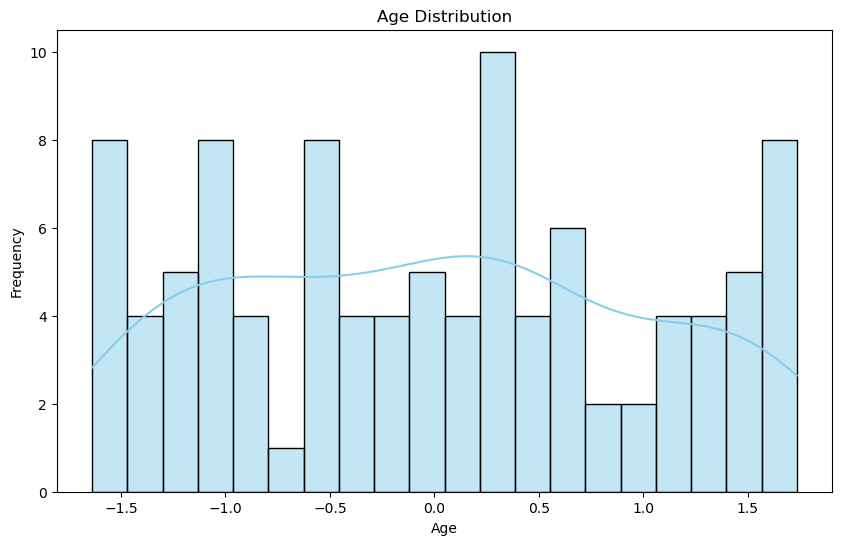

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data_encoded['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

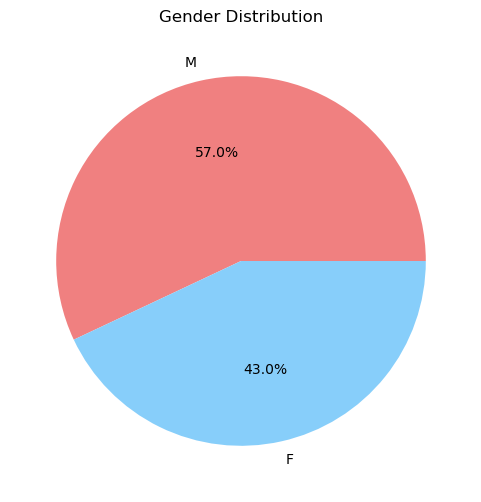

In [10]:
plt.figure(figsize=(6,6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

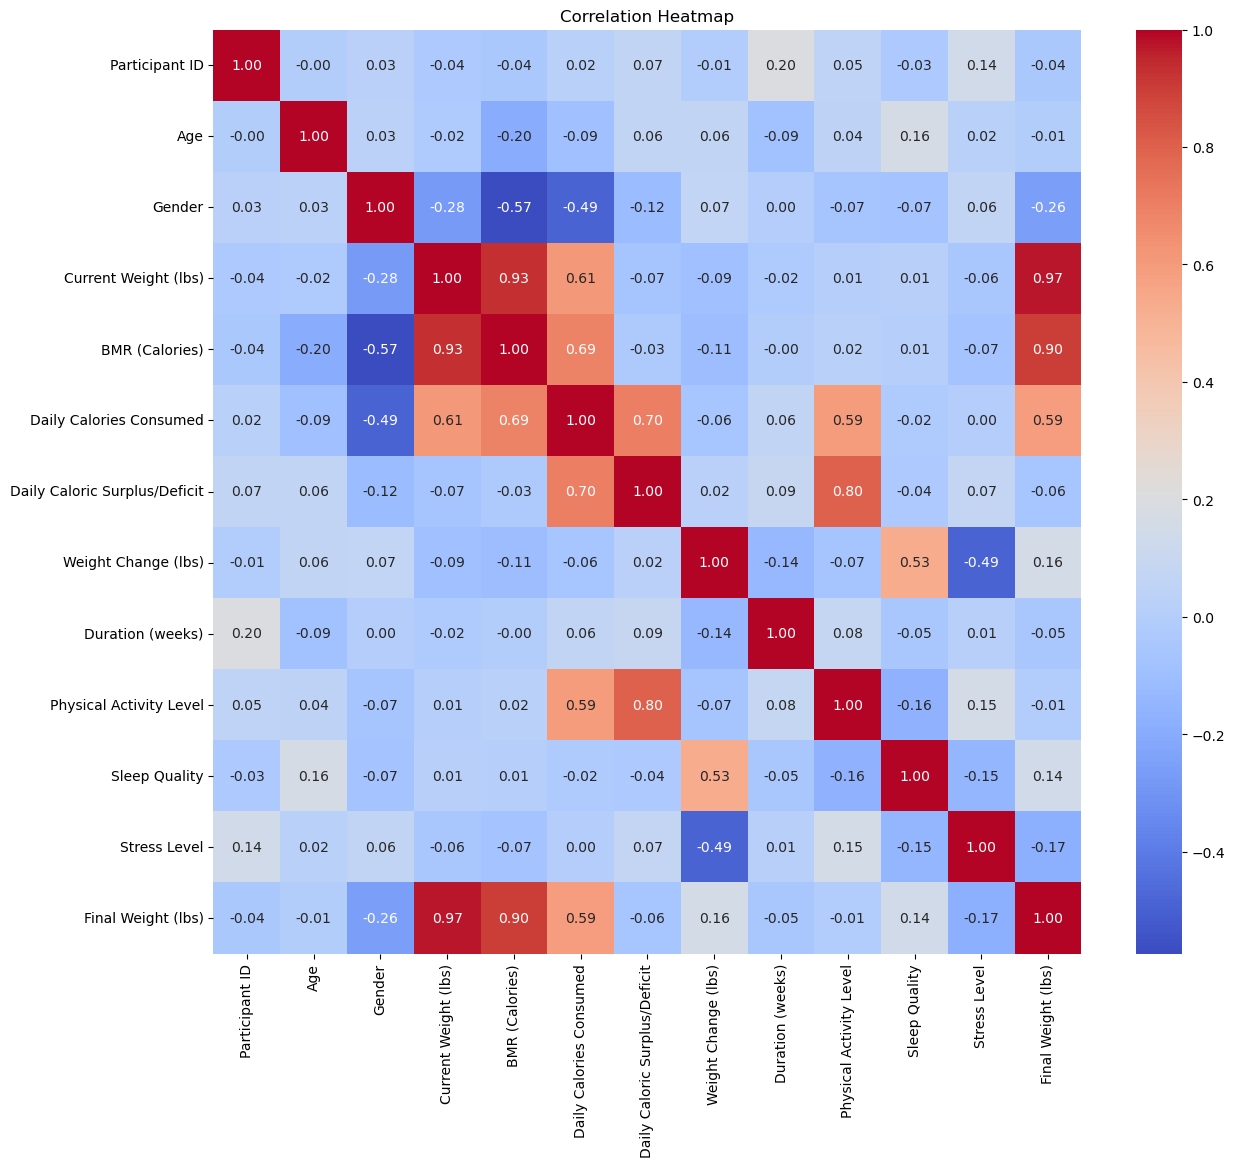

In [11]:
plt.figure(figsize=(14,12))
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

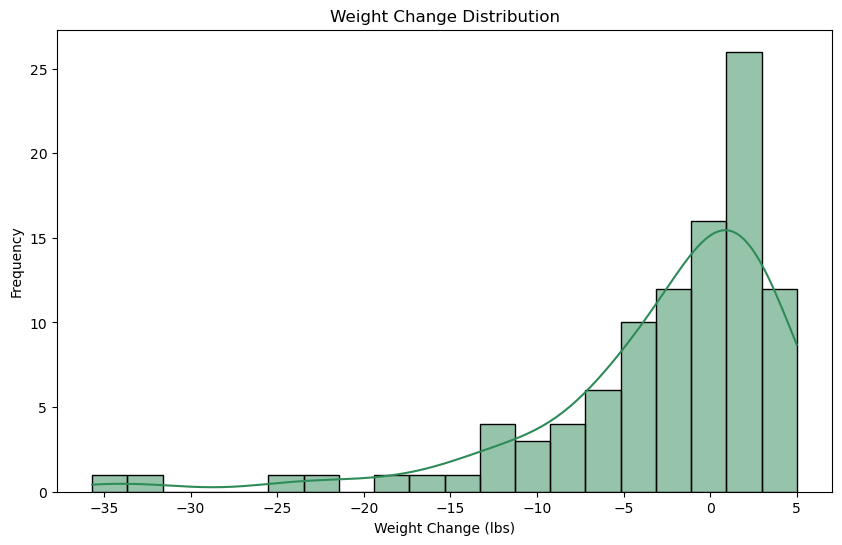

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data_encoded['Weight Change (lbs)'], bins=20, kde=True, color='seagreen')
plt.title('Weight Change Distribution')
plt.xlabel('Weight Change (lbs)')
plt.ylabel('Frequency')
plt.show()

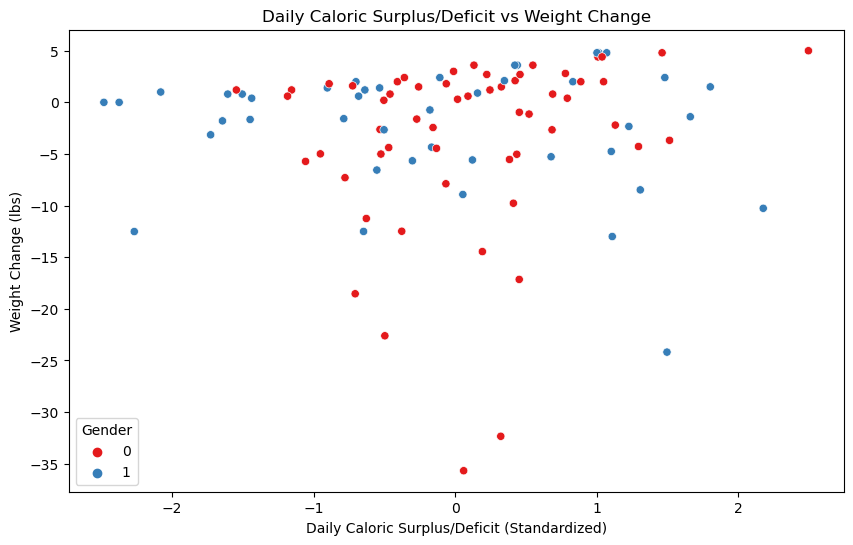

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Daily Caloric Surplus/Deficit', y='Weight Change (lbs)', data=data_encoded, hue='Gender', palette='Set1')
plt.title('Daily Caloric Surplus/Deficit vs Weight Change')
plt.xlabel('Daily Caloric Surplus/Deficit (Standardized)')
plt.ylabel('Weight Change (lbs)')
plt.show()

### Models

In [14]:
X_reg = data_encoded.drop(['Participant ID', 'Weight Change (lbs)', 'Final Weight (lbs)'], axis=1)
y_reg = data_encoded['Weight Change (lbs)']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

lr_predictions = lr_model.predict(X_test_reg)

In [15]:
print("Linear Regression Evaluation:")
print('Mean Absolute Error:', mean_absolute_error(y_test_reg, lr_predictions))
print('Mean Squared Error:', mean_squared_error(y_test_reg, lr_predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_reg, lr_predictions)))
print('R2 Score:', r2_score(y_test_reg, lr_predictions))

Linear Regression Evaluation:
Mean Absolute Error: 3.291097616503946
Mean Squared Error: 18.916423099620907
Root Mean Squared Error: 4.349301449614743
R2 Score: -0.4355212358733276


In [16]:
# Function to categorize weight change
def categorize_weight_change(value):
    if value < -2:
        return 'Weight Loss'
    elif -2 <= value <= 2:
        return 'No Change'
    else:
        return 'Weight Gain'

# Apply the function to create a new target variable
data_encoded['Weight Change Category'] = data_encoded['Weight Change (lbs)'].apply(categorize_weight_change)

# Encode the target variable
label_encoder = LabelEncoder()
data_encoded['Weight Change Category Encoded'] = label_encoder.fit_transform(data_encoded['Weight Change Category'])

In [17]:
# Features and target variable for classification
X_clf = data_encoded.drop(['Participant ID', 'Weight Change (lbs)', 'Weight Change Category',
                           'Weight Change Category Encoded', 'Final Weight (lbs)'], axis=1)
y_clf = data_encoded['Weight Change Category Encoded']

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2,
                                                                    random_state=42, stratify=y_clf)

In [18]:
# Features and target variable for classification
X_clf = data_encoded.drop(['Participant ID', 'Weight Change (lbs)', 'Weight Change Category', 'Weight Change Category Encoded', 'Final Weight (lbs)'], axis=1)
y_clf = data_encoded['Weight Change Category Encoded']

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_clf, y_train_clf)
lr_predictions_clf = lr_classifier.predict(X_test_clf)

In [19]:
# Function to evaluate classification models
def evaluate_classification_model(y_true, y_pred, model_name):
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Evaluate Logistic Regression Classifier
evaluate_classification_model(y_test_clf, lr_predictions_clf, 'Logistic Regression')

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   No Change       0.58      0.88      0.70         8
 Weight Gain       0.75      0.75      0.75         4
 Weight Loss       0.75      0.38      0.50         8

    accuracy                           0.65        20
   macro avg       0.69      0.67      0.65        20
weighted avg       0.68      0.65      0.63        20



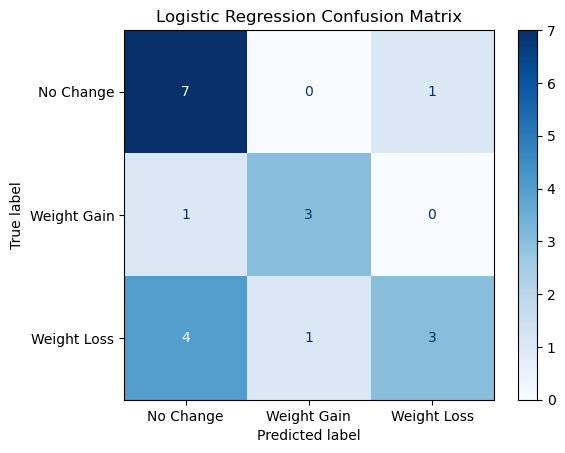

In [20]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Plot for Logistic Regression
plot_confusion_matrix(y_test_clf, lr_predictions_clf, 'Logistic Regression')

In [21]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_clf, y_train_clf)
dt_predictions_clf = dt_classifier.predict(X_test_clf)

In [22]:
# Function to evaluate classification models
def evaluate_classification_model(y_true, y_pred, model_name):
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Evaluate Decision Tree Classifier
evaluate_classification_model(y_test_clf, dt_predictions_clf, 'Decision Tree Classifier')

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

   No Change       0.62      1.00      0.76         8
 Weight Gain       1.00      0.50      0.67         4
 Weight Loss       1.00      0.62      0.77         8

    accuracy                           0.75        20
   macro avg       0.87      0.71      0.73        20
weighted avg       0.85      0.75      0.75        20



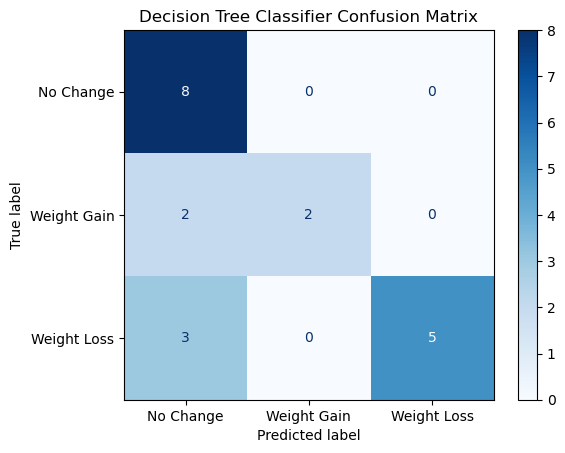

In [23]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Plot for Decision Tree Classifier
plot_confusion_matrix(y_test_clf, dt_predictions_clf, 'Decision Tree Classifier')

In [24]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_clf, y_train_clf)

# Make predictions
rf_predictions_clf = rf_classifier.predict(X_test_clf)

In [25]:
# Function to evaluate classification models
def evaluate_classification_model(y_true, y_pred, model_name):
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Evaluate Random Forest Classifier
evaluate_classification_model(y_test_clf, rf_predictions_clf, 'Random Forest Classifier')

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

   No Change       0.54      0.88      0.67         8
 Weight Gain       1.00      0.50      0.67         4
 Weight Loss       0.80      0.50      0.62         8

    accuracy                           0.65        20
   macro avg       0.78      0.62      0.65        20
weighted avg       0.74      0.65      0.65        20



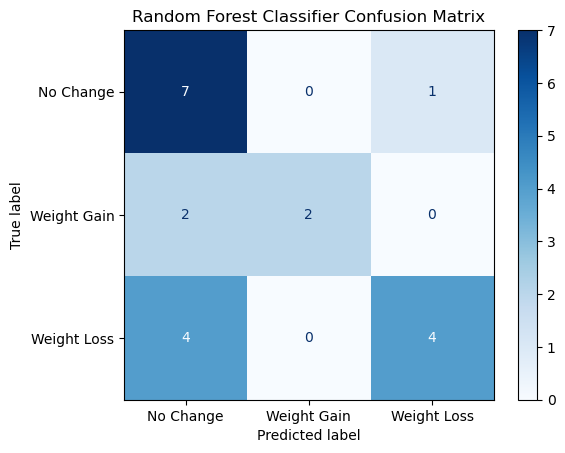

In [26]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Plot for Random Forest Classifier
plot_confusion_matrix(y_test_clf, rf_predictions_clf, 'Random Forest Classifier')

In [27]:
# Random Forest 분류기 최적화
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_clf, y_train_clf)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator
best_rf_classifier = grid_search.best_estimator_

# Make predictions with the optimized model
best_rf_predictions = best_rf_classifier.predict(X_test_clf)

# Evaluate the optimized model
evaluate_classification_model(y_test_clf, best_rf_predictions, 'Optimized Random Forest Classifier')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Optimized Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

   No Change       0.57      1.00      0.73         8
 Weight Gain       1.00      0.50      0.67         4
 Weight Loss       1.00      0.50      0.67         8

    accuracy                           0.70        20
   macro avg       0.86      0.67      0.69        20
weighted avg       0.83      0.70      0.69        20



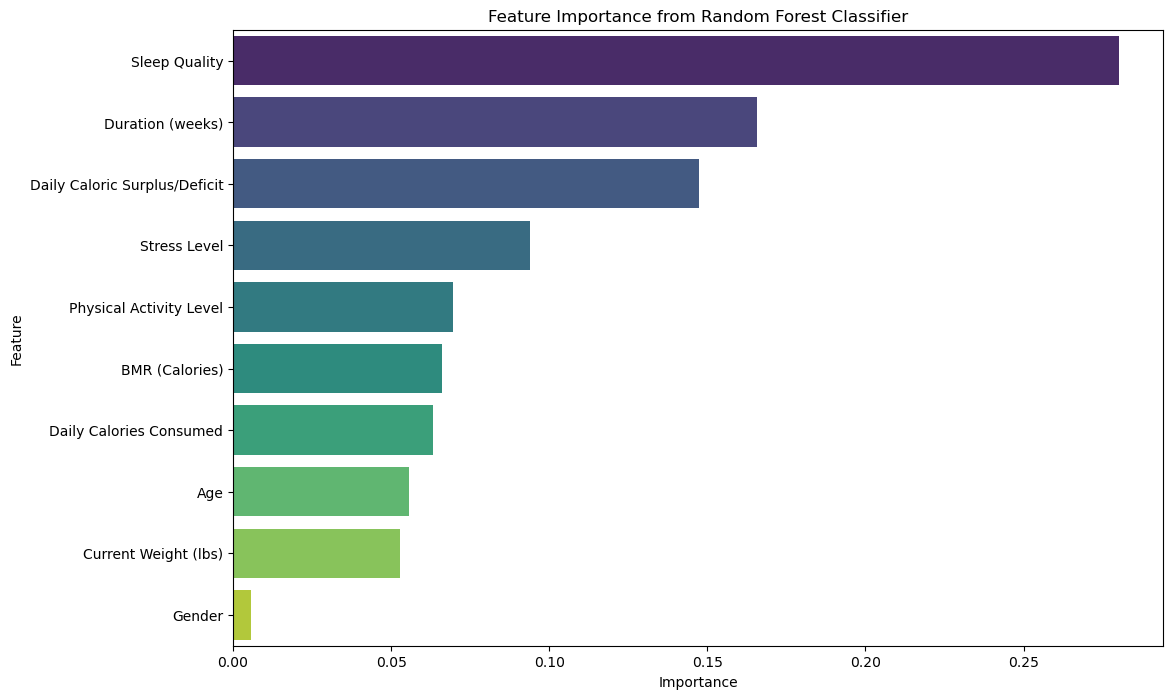

In [28]:
# Get feature importances from the Random Forest model
importances = rf_classifier.feature_importances_
feature_names = X_clf.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()

#### Sleep Quality 가 가장 중요한 요소로 보여짐